# Homework 3: Didn't Catch Them All
Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Tuesday, April 25  

Your Name

If there are issues with the homework, please [e-mail Prof. Tanedo](mailto:flip.tanedo@ucr.edu) before the weekend. 

Make sure you do Problem 1.B and 1.C absolutely correctly (check against the plot in 1.D to see if you are correct). The rest of the problem set are variations of this that involve lots of "copy-pasta." (And so the problem set isn't as long as it looks.)

## Problem 1: Lotka-Volterra equations

The **Lotka-Volterra** equations are a model of the population dynamics of predators and prey. See: https://en.wikipedia.org/wiki/Lotka–Volterra_equations

Let $x$ be the population of [Caterpie](http://www.pokemon.com/us/pokedex/caterpie) (prey).  
Let $y$ be the population of [Pidgeotto](http://www.pokemon.com/us/pokedex/pidgeotto) (predator).

The Lotka-Volterra equations are:  

$\displaystyle \frac{dx}{dt} = \alpha x - \beta x y$  

$\displaystyle \frac{dy}{dt} = \delta x y - \gamma y$  
 
The dimensionless parameters $\alpha$, $\beta$, $\gamma$, and $\delta$ are positive real numbers that characterize the interaction of the two species.

## 1.A What do these parameters mean?

"Read" these equations and explain, in words, what the paramters $\alpha$, $\beta$, $\gamma$, and $\delta$ mean. 


We'll do the first one together: If $\alpha$ goes up, does $\dot x$ go up or down? *When $\alpha$ goes up, $\dot x$ goes up, so that the number of prey increase.* We thus interpret $\alpha$ as a parameter that tells us about the **reproduction rate** of Caterpie. 

* Explain what the remaining parameters mean.

* If $\delta = \beta = 0$, these equations decouple and have a simple analytic solution. How do you interpret these solutions? What happens as $t\to \infty$? (How do you interpret this?)

# Defining Parameters
## $\beta $
As $\beta$ goes up, $\dot x$ decreases, so the number of _prey_ decreases.  Therefore, $\beta$ would be representing the __death rete__ of Caterpie.
## $\delta$
As $\delta$ increases, $\dot y$ increases, so the number of _predators_ increases.  We then define $\delta$ as the __reproduction rate__ of Pidgeotto.
## $\gamma$
As $\gamma$ goes up, $\dot y$ decreases, so the number of _predators_ decrease.  $\gamma$ is defined as the __death rate__ of Pidgeotto.
## $\delta$ and $\beta$ equal to zero
If $\delta$ and $\beta$ are zero then the population size of Caterpie will increase and the population size of Pidgeotto will decrease as time goes on. 

## 1.B Code this up!

Treat $\alpha$, $\beta$, $\delta$, and $\gamma$ as [global variables](http://stackoverflow.com/questions/484635/are-global-variables-bad). Code the Lotka-Volterra equations as:
  

$\displaystyle \frac{dx}{dt} = f(x,y,t)$  

$\displaystyle \frac{dy}{dt} = g(x,y,t)$  

In [1]:
# a quick way to fix these parameters in one line
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

def f(x,y,t):
    '''
    This is the rate of change of Caterpie as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return (alpha*x) - beta*x*y

def g(x,y,t):
    '''
    This is the rate of change of Pigeotto as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return (delta*y*x - gamma*y)

In [2]:
# Test your code: you should get 0.047 and -0.09:
print( f(.1,.1,0) )
print( g(.1,.1,0) )

0.047
-0.09


## 1.C Time evolution

Fix initial conditions, $x_0$, $y_0$ at $t=0$. We would like to know what happens after a year. We won't be picky about units, but you should be comfortable that implicitly $t$ has units of time.

It helps to do the following in one cell so that you can re-run it with different values to see what happens. (By the way, you should do this. Not for any extra credit, but just to *play* with the tools you're building.)

1. [initialize a python array](http://lmgtfy.com/?q=how+to+initialize+an+array+in+numpy) with 365 elements representing the days of the year. We'll use [`arange`](https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation) from Numpy, following what we did in [Lecture 7](https://github.com/Physics177-2017/Lec07-EulerMethod/blob/master/Lecture%207%20Euler's%20Method.ipynb)

2. Use **Euler's method** to fill python arrays `xlist` and `ylist` with the Caterpie and Pigeotto populations for each day.
    * Initialize empty python arrays `xlist` and `ylist`
    * Initialize the "updating" variables `x` and `y` to their initial values `x0` and `y0`
    * In a `for` loop, `append` the `x` and `y` values into `xlist` and `ylist` and then update the `x` and `y` values using the Lotka-Volterra equations.

3. Plot the populations as a function of time 
    * Convert the arrays `t`, `x`, and `y` into Numpy arrays.
    * Use `matplotlib` to plot $x(t)$ and $y(t)$


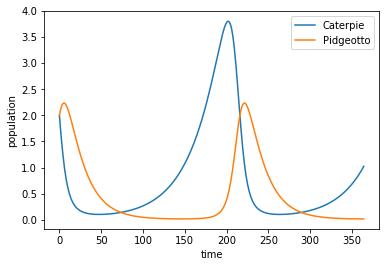

In [3]:
## PART 1
## If you want to use np.arange(...)
import numpy as np

# A reminder of our earlier parameters
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 365 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

xlist = []# FILL THIS IN
ylist = []# FILL THIS IN

# Initialize x and y
x = x0# FILL THIS IN
y = y0# FILL THIS IN

for t in time:
    xlist.append(x)
    x += dt*f(x,y,t)# FILL THIS IN
    ylist.append(y)
    y += dt*g(x,y,t)# FILL THIS IN

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt

plt.plot(tt,xx,label='Caterpie')
plt.plot(tt,yy,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

## 1.D Discussion

Your plot should reproduce this:

<img src="HW3_plot1.png">

In your own words, tell the story of what is going on with the Caterpie and Pidgeotto populations over the time period shown. What do you expect will happen as these populations continue to dynamically evolve?

# Explanation
Initially the population of predator and prey is the same but as time progresses the predators increase in population for a while but then the population of both the predators and prey begin to fall till they go near the brink of extinction.  As they continue to evolve the same cycle will continue to occur.



## 1.E What happens in the future?

Copy the code from Problem 1.C and paste it in a new cell below. Re-run it for $N=500$.

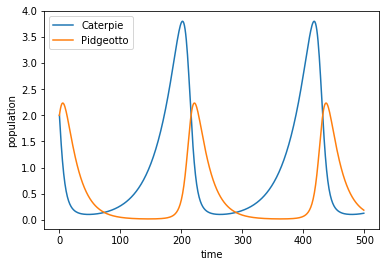

In [4]:
## YOUR CODE HERE (start by copy-pasting from Problem 1.C)
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 500 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

xblist = []# FILL THIS IN
yblist = []# FILL THIS IN

# Initialize x and y
xb = x0# FILL THIS IN
yb = y0# FILL THIS IN

for t in time:
    xblist.append(xb)
    xb += dt*f(xb,yb,t)# FILL THIS IN
    yblist.append(yb)
    yb += dt*g(xb,yb,t)# FILL THIS IN

tt = np.array(time)
xxb = np.array(xblist)
yyb = np.array(yblist)

import matplotlib.pyplot as plt

plt.plot(tt,xxb,label='Caterpie')
plt.plot(tt,yyb,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

## 1.F Other parameters

Copy the code from Problem 1.C and plot the following scenario:  
`alpha, beta, delta, gamma = 4, 2, 3.0, 3.0`  
`N = 100`

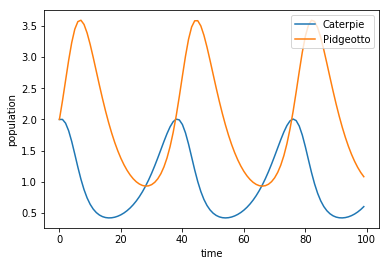

In [5]:
## YOUR CODE HERE (start by copy-pasting from Problem 1.C)
alpha, beta, delta, gamma = 4, 2, 3.0, 3.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 100 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

## PART 2

xclist = []# FILL THIS IN
yclist = []# FILL THIS IN

# Initialize x and y
xc = x0# FILL THIS IN
yc = y0# FILL THIS IN

for t in time:
    xclist.append(xc)
    xc += dt*f(xc,yc,t)# FILL THIS IN
    yclist.append(yc)
    yc += dt*g(xc,yc,t)# FILL THIS IN

tt = np.array(time)
xxc = np.array(xclist)
yyc = np.array(yclist)

import matplotlib.pyplot as plt


plt.plot(tt,xxc,label='Caterpie')
plt.plot(tt,yyc,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

## 1.G When things break down

Copy the code from Problem 1.C and plot the following scenario:  
`dt = 0.5`  

The resulting plot will not look like your result from Problem 1.C. For `dt = 0.75` things get really strange. Things will get worse as `dt` becomes larger. Say a few words about what's going on. 

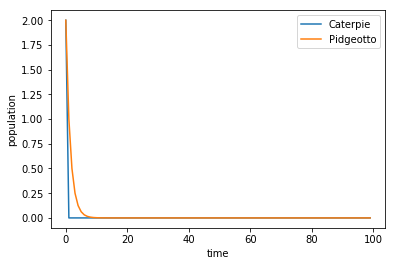

In [6]:
## YOUR CODE HERE (start by copy-pasting from Problem 1.C)
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0
x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.5  # time step
N = 100 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

## PART 2

xlist = []# FILL THIS IN
ylist = []# FILL THIS IN

# Initialize x and y
x = x0# FILL THIS IN
y = y0# FILL THIS IN

for t in time:
    xlist.append(x)
    x += dt*f(x,y,t)# FILL THIS IN
    ylist.append(y)
    y += dt*g(x,y,t)# FILL THIS IN

## PART 3

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt

plt.plot(tt,xx,label='Caterpie')
plt.plot(tt,yy,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

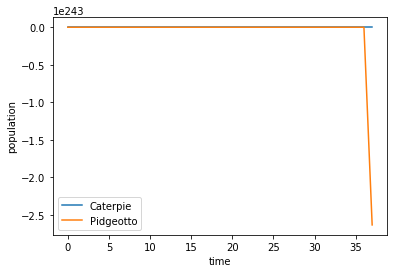

In [7]:
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0
x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.5  # time step
N = 100 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

## PART 2

xlist = []# FILL THIS IN
ylist = []# FILL THIS IN

x = x0# FILL THIS IN
y = y0# FILL THIS IN
dt=0.75

for t in time:
    xlist.append(x)
    x += dt*f(x,y,t)# FILL THIS IN
    ylist.append(y)
    y += dt*g(x,y,t)# FILL THIS IN

## PART 3

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt

plt.plot(tt,xx,label='Caterpie')
plt.plot(tt,yy,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

# Explaining larger dt
As __dt__ gets larger the bigger the uncertainty of what occurs to the populations increases which then leads to the extinction of the populations.

## Problem 2: Plotting Practice


### 2.A Plotting on the Caterpie--Pidgeotto plane

Copy the code from Problem 1.E (with `N=500`) and modify it so that it plots the Caterpie and Pidgeotto populations on the horizontal and vertical axes, respectively.

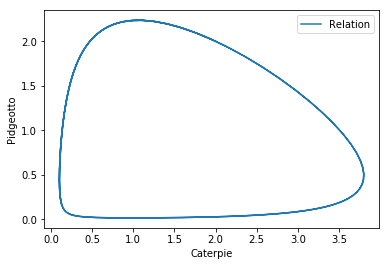

In [8]:
## YOUR CODE HERE (start by copy-pasting from Problem 1.E)
## Your modifications will be at the bottom of the cell
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 500 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

xbblist = []# FILL THIS IN
ybblist = []# FILL THIS IN

# Initialize x and y
xbb = x0# FILL THIS IN
ybb = y0# FILL THIS IN

for t in time:
    xbblist.append(xbb)
    xbb += dt*f(xbb,ybb,t)# FILL THIS IN
    ybblist.append(ybb)
    ybb += dt*g(xbb,ybb,t)# FILL THIS IN

tt = np.array(time)
xxbb = np.array(xbblist)
yybb = np.array(ybblist)

import matplotlib.pyplot as plt

plt.plot(xxbb,yybb,label='Relation')
plt.xlabel('Caterpie')
plt.ylabel('Pidgeotto')
plt.legend()
plt.show()

### 2.B Plotting the velocity in population space

**Quiver plots** are what `matplotlib` calls plots of vector fields.  The data required to plot a vector field are: the $x$ and $y$ positions of the base of the vector ("bottom part" of the arrow) and the $x$ and $y$ components of the vector itself. In the example below, we call the latter two numbers $u$ and $v$.

In order to understand how we set these up, you may want to brush up on what meshgrid does. Here are a couple of references:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html (check out the examples)
http://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python (this is a very good discussion)

The documentation on quiver plots is sparse. Here are a few links:

A simple example: http://www.scipy-lectures.org/intro/matplotlib/auto_examples/plot_quiver_ex.html
http://stackoverflow.com/questions/34375345/how-does-pythons-matplotlib-pyplot-quiver-exactly-work
I have not used plot.ly to make plots, but you are welcome to use it instead if it's easier. (Note: if you do this, you're on your own!) https://plot.ly/matplotlib/quiver-plots/
The matplotlib "advanced quiver plots" examples are perhaps a little too advanced for beginners: https://matplotlib.org/2.0.0/examples/pylab_examples/quiver_demo.html 

Here's an example of how they work:

side=
[ 0.  1.  2.  3.  4.]
x=
[[ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]]
u=
[[ 0.  2.  4.  6.  8.]
 [ 0.  2.  4.  6.  8.]
 [ 0.  2.  4.  6.  8.]
 [ 0.  2.  4.  6.  8.]
 [ 0.  2.  4.  6.  8.]]


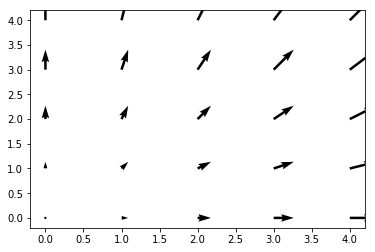

In [9]:
## EXAMPLE OF HOW QUIVER PLOTS WORK

import numpy as np
import matplotlib.pyplot as plt

side = np.linspace(0,4,5)

# base positions of the vectors
x,y = np.meshgrid(side,side)

# x and y components of the vectors at a given point
u,v = np.meshgrid(2*side,2*side)

print("side=") 
print(side)

print("x=") 
print(x)

print("u=") 
print(u)

plt.quiver(x, y, u, v, scale=100)
plt.show()

In this problem, complete the code below to produce a quiver plot for the Lotka-Volterra system of equations above. You will also overlay the result from Problem 2.A to show that that is an **integral curve** for the system of differential equations.

In other words, the plot from 2.A is a curve such that the "quiver" at each point on the curve is exactly tangent to the curve. Further, the magnitude of the "quiver" is the speed at which the two populations are changing along the curve.

Extra Credit: also make a plot using streamplot: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.streamplot

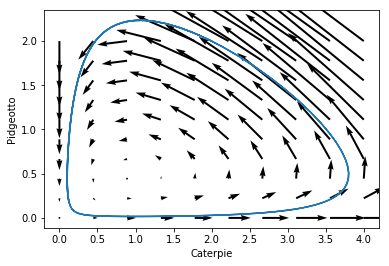

In [10]:
ff = np.vectorize(f)
gg = np.vectorize(g)

side = np.linspace(0,4,10)
XX,YY = np.meshgrid(side,side/2)
UU = ff(XX,YY,0)
VV = gg(XX,YY,0)

plt.quiver(XX,YY,UU,VV,scale=20)
plt.plot(xxbb,yybb,label='PvC')
plt.xlabel('Caterpie')
plt.ylabel('Pidgeotto')
plt.show()

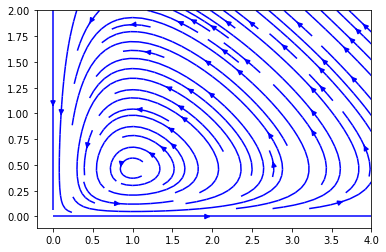

In [11]:
plt.streamplot(XX,YY,UU,VV,density = 1,linewidth = None, color=(0,0,1,1), cmap=None, norm=None, arrowsize=1,
               arrowstyle='-|>', minlength=0.1, transform=None, zorder=None, start_points=None, hold=None, data=None)
plt.show()

## Problem 3: External effects

The $f(x,y,t)$ and $g(x,y,t)$ used for problems 1 and 2 had no explicit time dependence. The Caterpie and Pidgeotto population dynamics were completely determined by the current populations. It is not hard to imagine, however, that there may be external time-dependent effects. Perhaps Pigeottos hunt more effectively at night, or perhaps Caterpies have a cyclic cycle of being outside where they can be hunted by Pigeottos.

We'll model some time dependence by tweaking the $f$ and $g$ expressions:

$\displaystyle \frac{dx}{dt} = \alpha x - \beta \left( 1 - A_\beta \sin(t) \right) x y + x \sin(t/4)$  

$\displaystyle \frac{dy}{dt} = \delta \left( 1 - A_\delta \sin(t) \right) x y - \gamma y + y \sin(t/4)$  

Code these into functions `f_new` and `g_new`

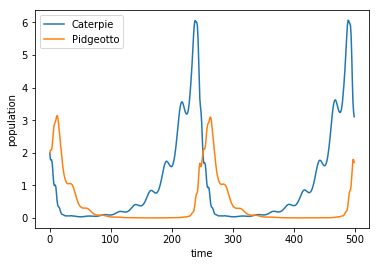

In [12]:
from math import sin as sin
from math import cos as cos

Abeta,Adelta = 0.7,0.7
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

def f_new(x,y,t):
    '''
    This is the rate of change of Caterpie as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return alpha*x - beta*(1-Abeta*sin(t))*x*y + x*sin(t/4)

def g_new(x,y,t):
    '''
    This is the rate of change of Pigeotto as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return delta*(1-Adelta*sin(t))*x*y - gamma*y + y*sin(t/4)

## Copy and paste your code from Problem 1.E here. 
## Make sure to change f and g to f_new and g_new
x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 500 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

xnlist = []# FILL THIS IN
ynlist = []# FILL THIS IN

# Initialize x and y
xn = x0# FILL THIS IN
yn = y0# FILL THIS IN

for t in time:
    xnlist.append(xn)
    xn += dt*f_new(xn,yn,t)# FILL THIS IN
    ynlist.append(yn)
    yn += dt*g_new(xn,yn,t)# FILL THIS IN

ttn = np.array(time)
xxn = np.array(xnlist)
yyn = np.array(ynlist)

import matplotlib.pyplot as plt

plt.plot(ttn,xxn,label='Caterpie')
plt.plot(ttn,yyn,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

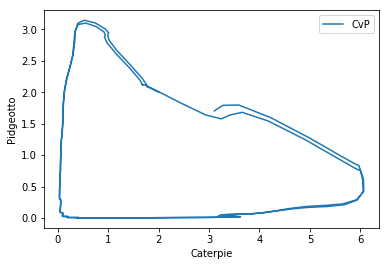

In [13]:
## Copy and paste your code from Problem 2.A here.
## Make sure to change f and g to f_new and g_new
x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 500 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

xmlist = []# FILL THIS IN
ymlist = []# FILL THIS IN

# Initialize x and y
xm = x0# FILL THIS IN
ym = y0# FILL THIS IN

for t in time:
    xmlist.append(xm)
    xm += dt*f_new(xm,ym,t)# FILL THIS IN
    ymlist.append(ym)
    ym += dt*g_new(xm,ym,t)# FILL THIS IN

tt = np.array(time)
xxm = np.array(xmlist)
yym = np.array(ymlist)

import matplotlib.pyplot as plt

plt.plot(xxm,yym,label='CvP')
plt.xlabel('Caterpie')
plt.ylabel('Pidgeotto')
plt.legend()
plt.show()

## Problem 4: Copy-Pasta 1.C, one more time

Copy and paste your previous solution to Problem 1.C. Modify the code so that instead of Euler's Method, you are filling `xlist` and `ylist` using the **Runge-Kutta** algorithm. Show that you get the same answer. 

**Optional**: I encourage you to play with the Euler Method in 1.C and the Runge-Kutta method here to see what happens as you increase the number of steps. (Coarse graining a little may help resolve the difference between the two methods.)

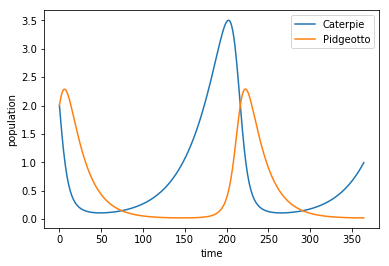

In [14]:
## YOUR CODE HERE
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2    # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 365 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

xrklist = []# FILL THIS IN
yrklist = []# FILL THIS IN

# Initialize x and y
xrk = x0# FILL THIS IN
yrk = y0# FILL THIS IN

for t in time:
    xrklist.append(xrk)
    k1x = dt*f(xrk,yrk,t)# FILL THIS IN
    k2x = dt*f(xrk+0.5*k1x, yrk + 0.5*k1x, t+0.5*dt)
    xrk += k2x
    
    yrklist.append(yrk)
    k1y = dt*g(xrk,yrk,t)# FILL THIS IN
    k2y = dt*g(xrk+0.5*k1y, yrk+0.5*k1y, t+0.5*dt)
    yrk += k2y

tt = np.array(time)
xxrk = np.array(xrklist)
yyrk = np.array(yrklist)

import matplotlib.pyplot as plt

plt.plot(tt,xxrk,label='Caterpie')
plt.plot(tt,yyrk,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

## Extra Credit: Animate

Follow the tutorial linked in the [extra credit problem of Homework 2](https://github.com/Physics177-2017/Homework02/blob/master/Homework_02.ipynb) to animate some of these plots. It may be useful to code the process in Problem 1.C as a function that takes in various parameters and outputs Numpy lists for $x$ and $y$.

Things you may want to animate:
* Animate the plot in Problem 1.C so the plot is "moving" with its time evolution (similar to giving a time-dependent phase shift to a sine wave)
* Plot a dot on the Caterpie--Pigeotto population plane and animate its movement with the evolution of time (this is an animated version of Problem 2.A)

You may (or may not) find the following references helpful:
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
http://stackoverflow.com/questions/11611705/animated-graphs-in-ipython-notebook


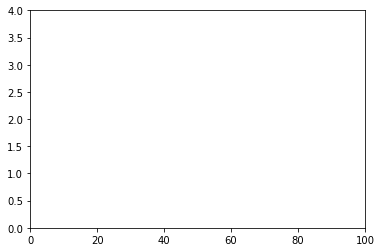

RuntimeError: No MovieWriters available!

In [15]:
## YOUR CODE HERE
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0,100), ylim=(0,4))
line, = ax.plot([],[], lw=2)

alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0
x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 365 # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 

xlist = []# FILL THIS IN
ylist = []# FILL THIS IN

# Initialize x and y
x = x0# FILL THIS IN
y = y0# FILL THIS IN

for t in time:
    xlist.append(x)
    x += dt*f(x,y,t)# FILL THIS IN
    ylist.append(y)
    y += dt*g(x,y,t)# FILL THIS IN

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

def init():
    line.set_data([],[])
    return line,
def animate(i):
    x = time
    y = yy
    lin.set_data(x,y)
    return line,
anim = animation.FuncAnimation(fig,animate,init_func=init,
                               frames =100,interval=20,blit=True)

plt.show() 
HTML(anim.to_html5_video())
